<a href="https://colab.research.google.com/github/felipesolferini/combustioncourse/blob/main/enthalpy_products.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install cantera

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.8/117.8 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 526.7/526.7 kB 17.2 MB/s eta 0:00:00


<ipython-input-2-b35489330eb5>:49: DeprecationWarning: FactoryBase::canonicalize: Model name 'IdealGas' is deprecated. Use 'ideal-gas' instead.
  gas1 = ct.Solution(thermo="IdealGas", species=species.values())


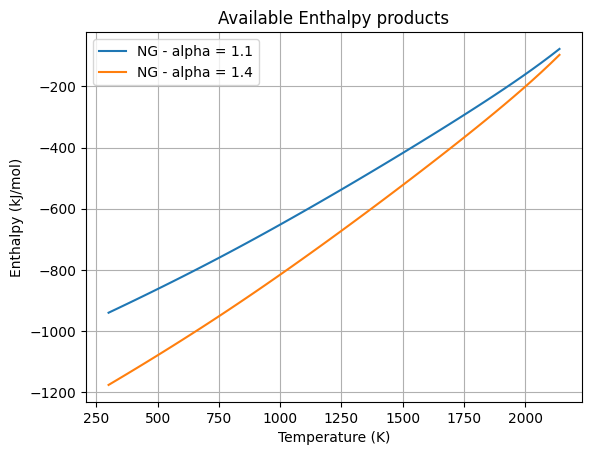

Adiabatic Flame Temperature NG - alpha = 1.1: 2139.802759366483 K
Adiabatic Flame Temperature NG - alpha = 1.4: 2139.802759366483 K


In [ ]:
import cantera as ct
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


# Equivalence ratio
phi = 0.9

# Name of gas 1

gas1_name = 'NG - alpha = 1.1'

#Entre com a relação ar/combustível do gas 1

AF1_volume = 11.38

# GAS 1 COMPOSITION
gas1_composition = {
    "CH4": 90,
    "C2H6": 5,
    "C3H8": 4,
    "CO2": 1,
    "N2": 0,
    "H2": 0}

# ENTRE COM A COMPOSICAO DO GAS 2

gas2_name = 'NG - alpha = 1.4'

#Entre com a relação ar/combustível do gas 1

AF2_volume = 14.49

# GAS 2 COMPOSITION
gas2_composition = {
    "CH4": 90,
    "C2H6": 5,
    "C3H8": 4,
    "CO2": 1,
    "N2": 0,
    "H2": 0}

def adiabatic_flame_temperature(phi, gas_composition, oxidizer):

    species = {S.name: S for S in ct.Species.list_from_file("gri30.yaml")}

    # Create an IdealGas object with the specified composition
    gas1 = ct.Solution(thermo="IdealGas", species=species.values())

    gas1.TP = 300, ct.one_atm

    gas1.set_equivalence_ratio(phi, gas_composition, oxidizer)
    gas1.equilibrate("HP")

    adiabatic_flame_temperature = gas1.T
    enthalpy = gas1.h

    return adiabatic_flame_temperature, enthalpy

def simulate_combustion(fuel_species, phi, temperature_range):

    # Get all of the Species objects defined in the GRI 3.0 mechanism
    species = {S.name: S for S in ct.Species.list_from_file("gri30.yaml")}

    # Create an IdealGas object with the specified composition
    gas = ct.Solution(thermo="IdealGas", species=species.values())

    gas.TP = 300, ct.one_atm

    # Set the equivalence ratio
    gas.set_equivalence_ratio(phi, fuel_species,oxidizer_species, basis='mole')

    gas.mole_fraction_dict()

    # Equilibrate the mixture at constant enthalpy and pressure (adiabatic flame)
    gas.equilibrate("HP")


    # Calculate enthalpy at each temperature
    enthalpy_values = []

    for temperature in temperature_range:
        gas.TP = temperature, ct.one_atm
        gas.equilibrate("TP")
        enthalpy_values.append(gas.enthalpy_mole/(10**(6)))

    return enthalpy_values

oxidizer_species = "O2:1, N2:3.76"

max_temp_1, max_enthalpy_1 = adiabatic_flame_temperature(phi,gas1_composition,oxidizer_species)

# Define temperature range up to adiabatic
temperature_range_NG = np.linspace(300, max_temp_1, 50)

# Simulate combustion for gas1
enthalpy_1 = simulate_combustion(
    gas1_composition, phi, temperature_range_NG
)


max_temp_2, max_enthalpy_2 = adiabatic_flame_temperature(phi,gas2_composition,oxidizer_species)


# Simulate combustion for gas2
temperature_range_h2 = np.linspace(300, max_temp_2, 50)

enthalpy_2 = simulate_combustion(
    gas2_composition, phi, temperature_range_h2
)

enthalpy_1 = np.array(enthalpy_1)

enthalpy_1 = enthalpy_1*(AF1_volume+1)

enthalpy_2 = np.array(enthalpy_2)

enthalpy_2 = enthalpy_2*(AF2_volume+1)


#enthalpy_h2 = np.array(enthalpy_h2)*10.6

# Plot the results
plt.plot(temperature_range_NG, enthalpy_1, label=gas1_name)
plt.plot(temperature_range_h2, enthalpy_2, label=gas2_name)
plt.xlabel('Temperature (K)')
plt.ylabel('Enthalpy (kJ/mol)')
plt.title('Available Enthalpy products')
plt.legend()
plt.grid()
plt.show()

# Display adiabatic flame temperatures
print(f"Adiabatic Flame Temperature {gas1_name}: {max_temp_1} K")
print(f"Adiabatic Flame Temperature {gas2_name}: {max_temp_2} K")